In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Reading the data

In [2]:
listings = pd.read_csv(r"~\Downloads\Term Project Data\listings.csv")
reviews = pd.read_csv(r"~\Downloads\Term Project Data\reviews.csv")


In [3]:
print(listings.columns.tolist())
print(reviews.columns.tolist())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [4]:
#Need to convert price to float
print(listings[["price"]].dtypes)
#problem, every value is an object and has a $ sign, so we need to change that
#print(listings["price"].head())
listings["price"] = listings["price"].replace("\$","", regex=True)
listings["price"] = listings["price"].replace(",","", regex=True)

listings["price"] = listings["price"].astype(float)
#print(listings["price"].head())
print(listings[["price"]].dtypes)

price    object
dtype: object
price    float64
dtype: object


In [5]:
#should maybe narrow down the airbnb's to be only the ones that're actually in/around sydney and not too far away
print(listings["neighbourhood_cleansed"].unique())
#Maybe we want to remove some of the farther away neighbourhoods? 
#listings = listings[(listings["neighbourhood_cleansed"] != "Camden") & (listings["neighbourhood_cleansed"] != "Penrith")]
listings.head()

['Sydney' 'Manly' 'Randwick' 'Waverley' 'Mosman' 'Marrickville'
 'Warringah' 'Leichhardt' 'Hornsby' 'Woollahra' 'Canterbury'
 'Sutherland Shire' 'Ryde' 'Ku-Ring-Gai' 'Pittwater' 'North Sydney'
 'Willoughby' 'Rockdale' 'The Hills Shire' 'Penrith' 'Ashfield'
 'Parramatta' 'Lane Cove' 'Hurstville' 'Hunters Hill' 'Auburn' 'Burwood'
 'Camden' 'Blacktown' 'Liverpool' 'City Of Kogarah' 'Bankstown'
 'Canada Bay' 'Botany Bay' 'Holroyd' 'Strathfield' 'Campbelltown'
 'Fairfield']


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,20230904181246,2023-09-05,city scrape,Rental unit in Potts Point · ★4.59 · 1 bedroom...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...",https://a0.muscache.com/pictures/2797669/17895...,40855,...,4.76,4.82,4.71,NaN,f,1,0,1,0,1.16
1,14250,https://www.airbnb.com/rooms/14250,20230904181246,2023-09-05,city scrape,Home in Balgowlah · ★4.67 · 3 bedrooms · 3 bed...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,https://a0.muscache.com/pictures/56935671/fdb8...,55948,...,4.33,4.67,4.33,Exempt,f,2,2,0,0,0.03
2,15253,https://www.airbnb.com/rooms/15253,20230904181246,2023-09-05,city scrape,Condo in Darlinghurst · ★4.51 · 1 bedroom · 1 ...,You will be staying in a unique duplex apartme...,The location is really central and there is nu...,https://a0.muscache.com/pictures/miso/Hosting-...,59850,...,4.73,4.75,4.53,PID-STRA-24061-7,t,2,1,1,0,3.70
3,44545,https://www.airbnb.com/rooms/44545,20230904181246,2023-09-05,previous scrape,Loft in Darlinghurst · ★4.87 · 1 bedroom · 1 b...,Sunny warehouse/loft apartment in the heart of...,Darlinghurst is home to some of Sydney's best ...,https://a0.muscache.com/pictures/a88d8e14-4f63...,112237,...,4.96,4.93,4.77,NaN,f,1,1,0,0,0.48
4,633322,https://www.airbnb.com/rooms/633322,20230904181246,2023-09-05,previous scrape,Rental unit in Manly · ★4.82 · 1 bedroom · 1 b...,Located just 2 minutes away from the East Manl...,Located on the prestigious leafy eastern hill ...,https://a0.muscache.com/pictures/001e4a33-d0c7...,3152466,...,4.89,4.94,4.66,NaN,f,1,1,0,0,0.80


In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11156,19220,2009-12-05,52946,Jeff,Colleen was friendly and very helpful regardin...
1,11156,32592,2010-03-31,99382,Michael,"Great place, centrally located, easy walk to t..."
2,11156,42280,2010-05-14,105797,Marina,Colleen is very friendly and helpful. The apar...
3,11156,140942,2010-11-17,259213,Sigrid,Dear Colleen!\r<br/>My friend Diemut from Germ...
4,11156,151966,2010-12-11,273389,Eduardo,"Lovely, interesting chats and very helpful giv..."


# Plotting the Airbnb's

In [7]:
#removing any duplicate listings
#why are there duplicated though? Will have to look into that
unique_airbnbs = listings.drop_duplicates(subset=['longitude', 'latitude'])
print(len(unique_airbnbs))
print(len(listings))


#plotting the location of the airbnbs
fig = px.scatter_mapbox(unique_airbnbs, lat = "latitude", lon = "longitude",
                        hover_name = "host_name", hover_data = ["price", "room_type", "neighbourhood_cleansed"],
                        zoom = 8.5, height = 600, width = 700,
                        color = "neighbourhood_cleansed")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#Source: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6

23645
24022


# Distribution of room Types

In [8]:
print(listings["room_type"].unique())
private = listings[listings["room_type"] == "Private room"]
shared = listings[listings["room_type"] == "Shared room"]
hotel = listings[listings["room_type"] == "Hotel room"]
entire = listings[listings["room_type"] == "Entire home/apt"]
room_counts = [len(private), len(entire), len(hotel), len(shared)]
room_types = listings["room_type"].unique()

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


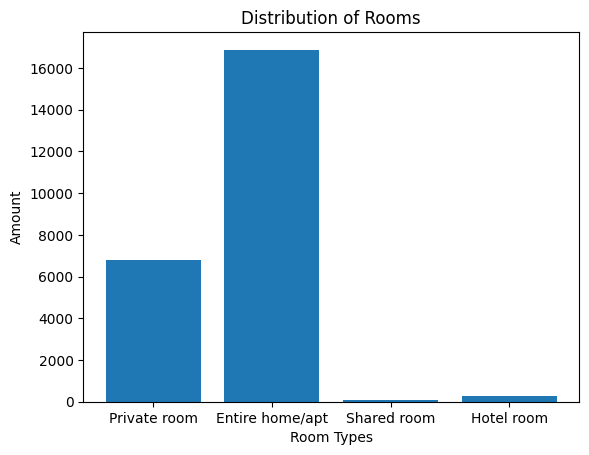

In [9]:
plt.bar(room_types, room_counts)
plt.xlabel("Room Types")
plt.ylabel("Amount")
plt.title("Distribution of Rooms")
plt.show()


# How does Price vary between Room Types

In [10]:
#This should work ones it is a float
average_price = [sum((private["price"]))/len(private), sum(entire["price"])/len(entire),sum(shared["price"])/len(shared),sum(hotel["price"])/len(hotel)]
average_price

[116.84450679267573, 373.90257777777776, 73.68840579710145, 286.9191919191919]

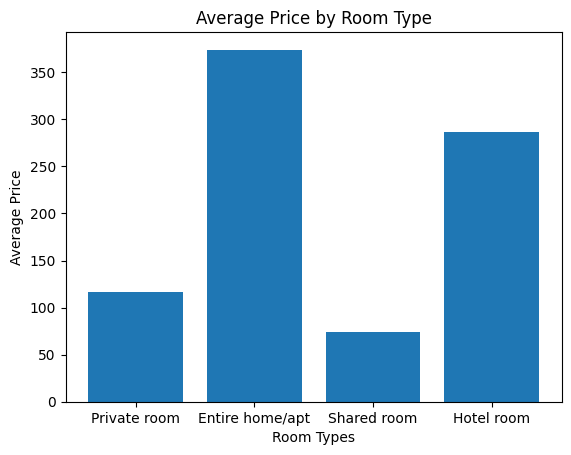

In [11]:
plt.bar(room_types, average_price)
plt.xlabel("Room Types")
plt.ylabel("Average Price")
plt.title("Average Price by Room Type")
plt.show()

# Reviews Text Analysis

Will need to look into this more to decide what exactly we need, was thinking using NLTK? Maybe Sci-kitlearn has something?

Maybe doing the same things with amenities?